In [1]:
import pandas as pd
import numpy as np
import random
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

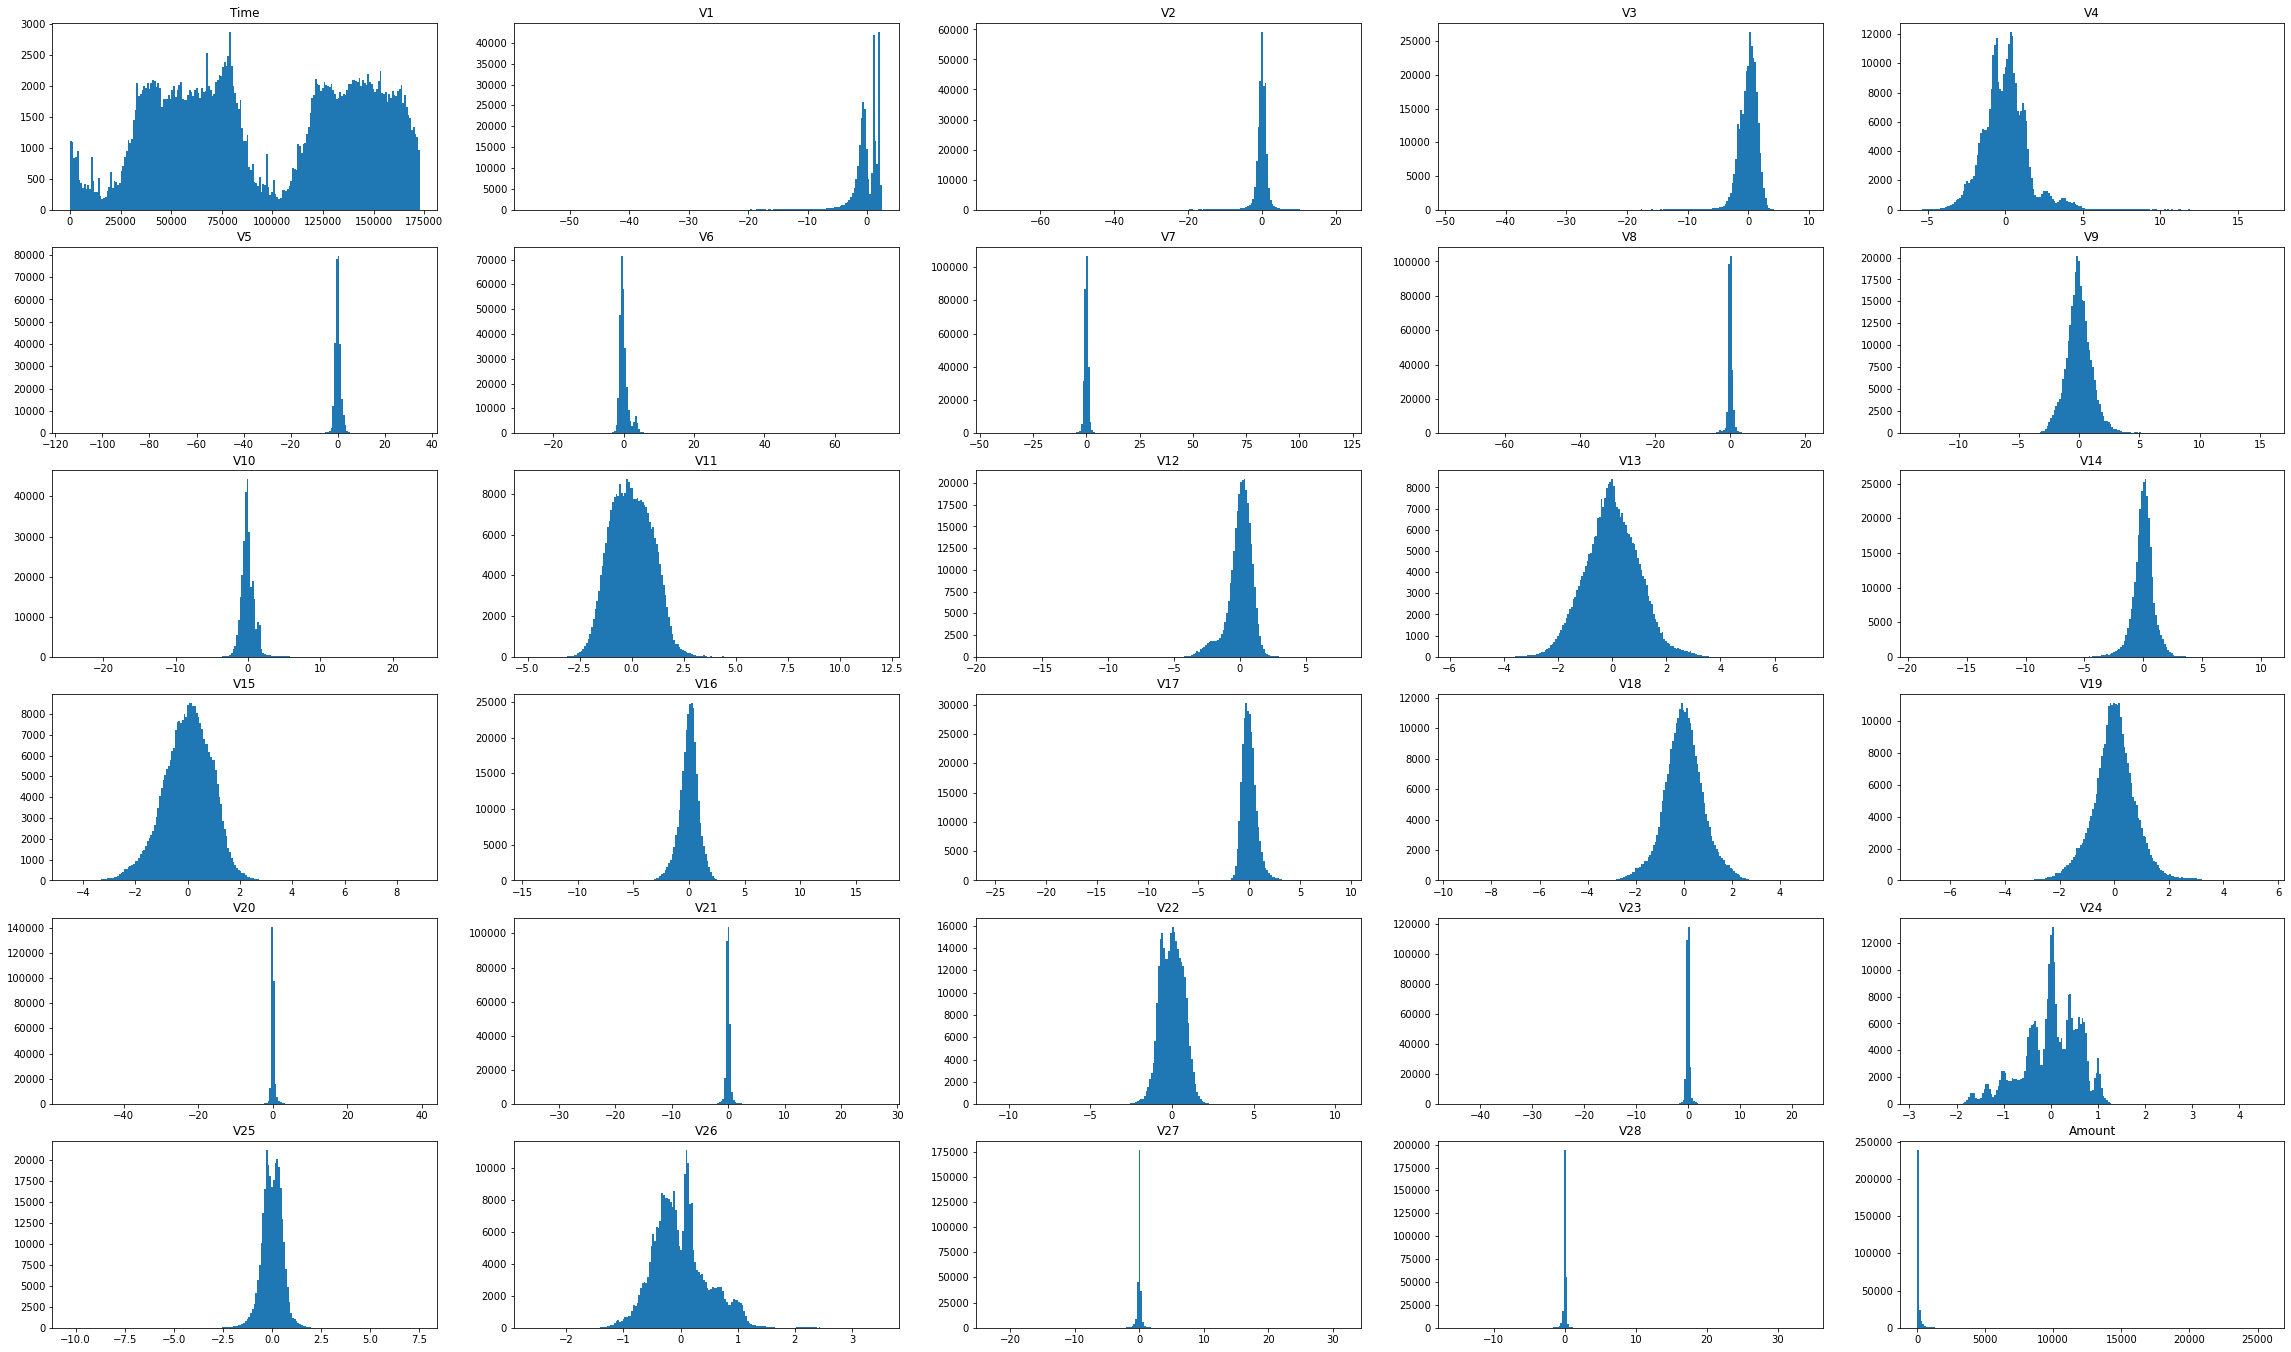

In [4]:
columns2 = df.columns.tolist()[:-1]
fig, ax = plt.subplots(6, 5, figsize=(40, 24))

m, n = ax.shape
counter = 0

for i in range(m):
    for j in range(n):
        ax[i, j].hist((df[columns2[counter]]), bins=200)
        ax[i, j].set_title(columns2[counter])
        counter += 1

In [5]:
data_0, data_1 = df[df['Class'] == 0], df[df['Class'] == 1]

# Feature-target split
X_0, y_0 = data_0.drop('Class', axis = 1), data_0['Class']
X_1, y_1 = data_1.drop('Class', axis = 1), data_1['Class']

# Splitting the authentic class and constructing the training set
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state = 40)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val_1, data_test_1 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Splitting the fraudulent class
X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size = 0.5, random_state = 40)
data_val_2, data_test_2 = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Merging data to construct the validation set and the test set
data_val, data_test = pd.concat([data_val_1, data_val_2], axis = 0), pd.concat([data_test_1, data_test_2], axis = 0)

data_val = data_val.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)

X_val, y_val = data_val.drop('Class', axis = 1), data_val['Class']
X_test, y_test = data_test.drop('Class', axis = 1), data_test['Class']

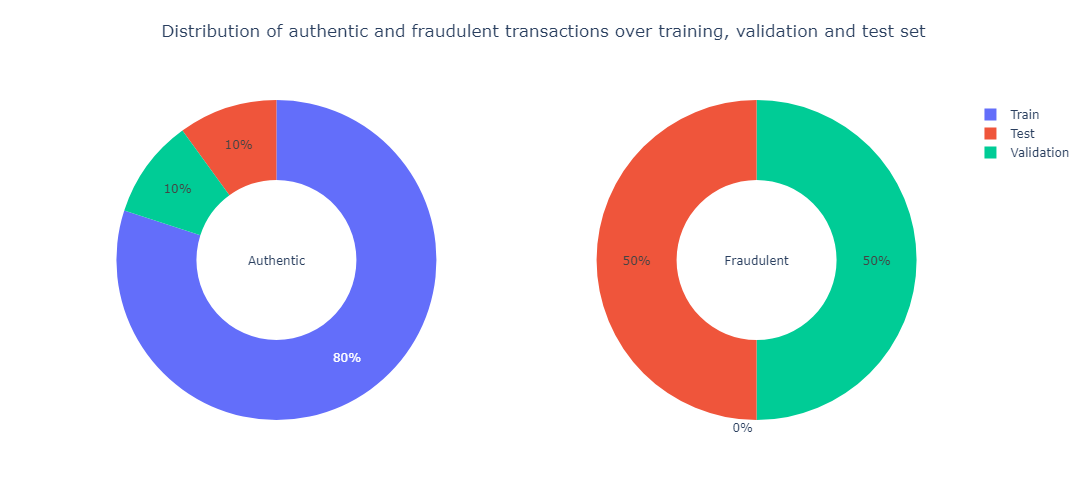

In [6]:
labels = ['Train', 'Validation', 'Test']

values_0 = [len(y_train[y_train == 0]), len(y_val[y_val == 0]), len(y_test[y_test == 0])]
values_1 = [len(y_train[y_train == 1]), len(y_val[y_val == 1]), len(y_test[y_test == 1])]

fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_trace(go.Pie(values = values_0, labels = labels, hole = 0.5, textinfo = 'percent', title = "Authentic"),
              row = 1, col = 1)
fig.add_trace(go.Pie(values = values_1, labels = labels, hole = 0.5, textinfo = 'percent', title = "Fraudulent"),
              row = 1, col = 2)

text_title = "Distribution of authentic and fraudulent transactions over training, validation and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [7]:
for df in [X_train, X_val, X_test]:
    df['Day'], temp = df['Time'] // (24*60*60), df['Time'] % (24*60*60)
    df['Hour'], temp = temp // (60*60), temp % (60*60)
    df['Minute'], df['Second'] = temp // 60, temp % 60

X_train[['Time', 'Day', 'Hour', 'Minute', 'Second']].head()

Time  Day  Hour  Minute  Second
19594    30401.0  0.0   8.0    26.0    41.0
124712   77397.0  0.0  21.0    29.0    57.0
167920  118964.0  1.0   9.0     2.0    44.0
47377    43191.0  0.0  11.0    59.0    51.0
41731    40804.0  0.0  11.0    20.0     4.0

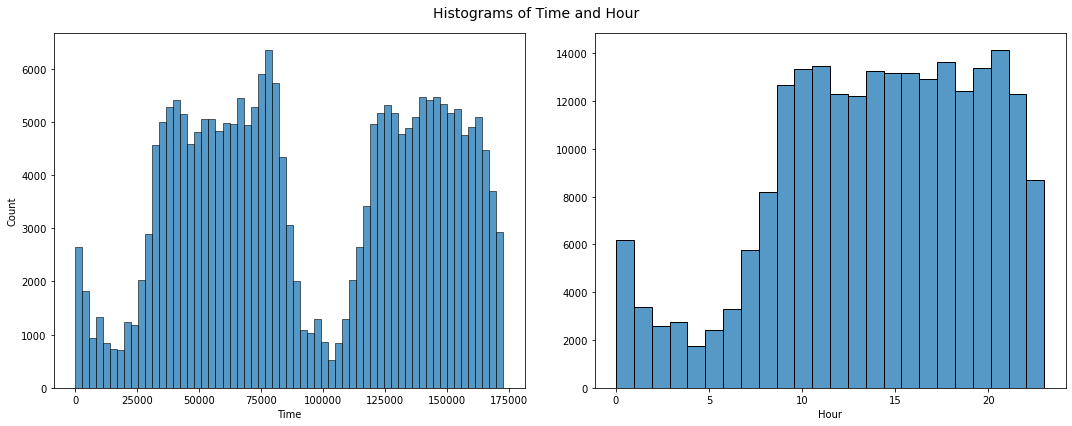

In [8]:
bins_train = math.floor(len(X_train)**(1/3))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = X_train, x = 'Time', bins = bins_train, ax = ax[0])
sns.histplot(data = X_train, x = 'Hour', bins = 24, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Time and Hour", size = 14)
plt.tight_layout()
plt.show()

In [9]:
for df in [X_train, X_val, X_test]:
    df['Amount_transformed'] = np.log10(df['Amount'] + 0.001)

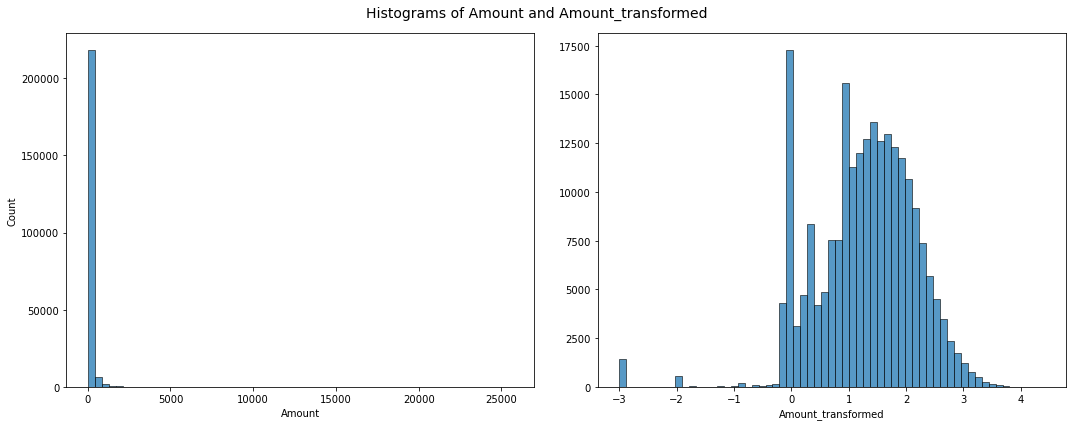

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
sns.histplot(data = X_train, x = 'Amount', bins = bins_train, ax = ax[0])
sns.histplot(data = X_train, x = 'Amount_transformed', bins = bins_train, ax = ax[1])
ax[1].set_ylabel(" ")
plt.suptitle("Histograms of Amount and Amount_transformed", size = 14)
plt.tight_layout()
plt.show()

In [11]:
for df in [X_train, X_val, X_test]:
    df.drop(['Time', 'Day', 'Minute', 'Second', 'Amount'], axis = 1, inplace = True)

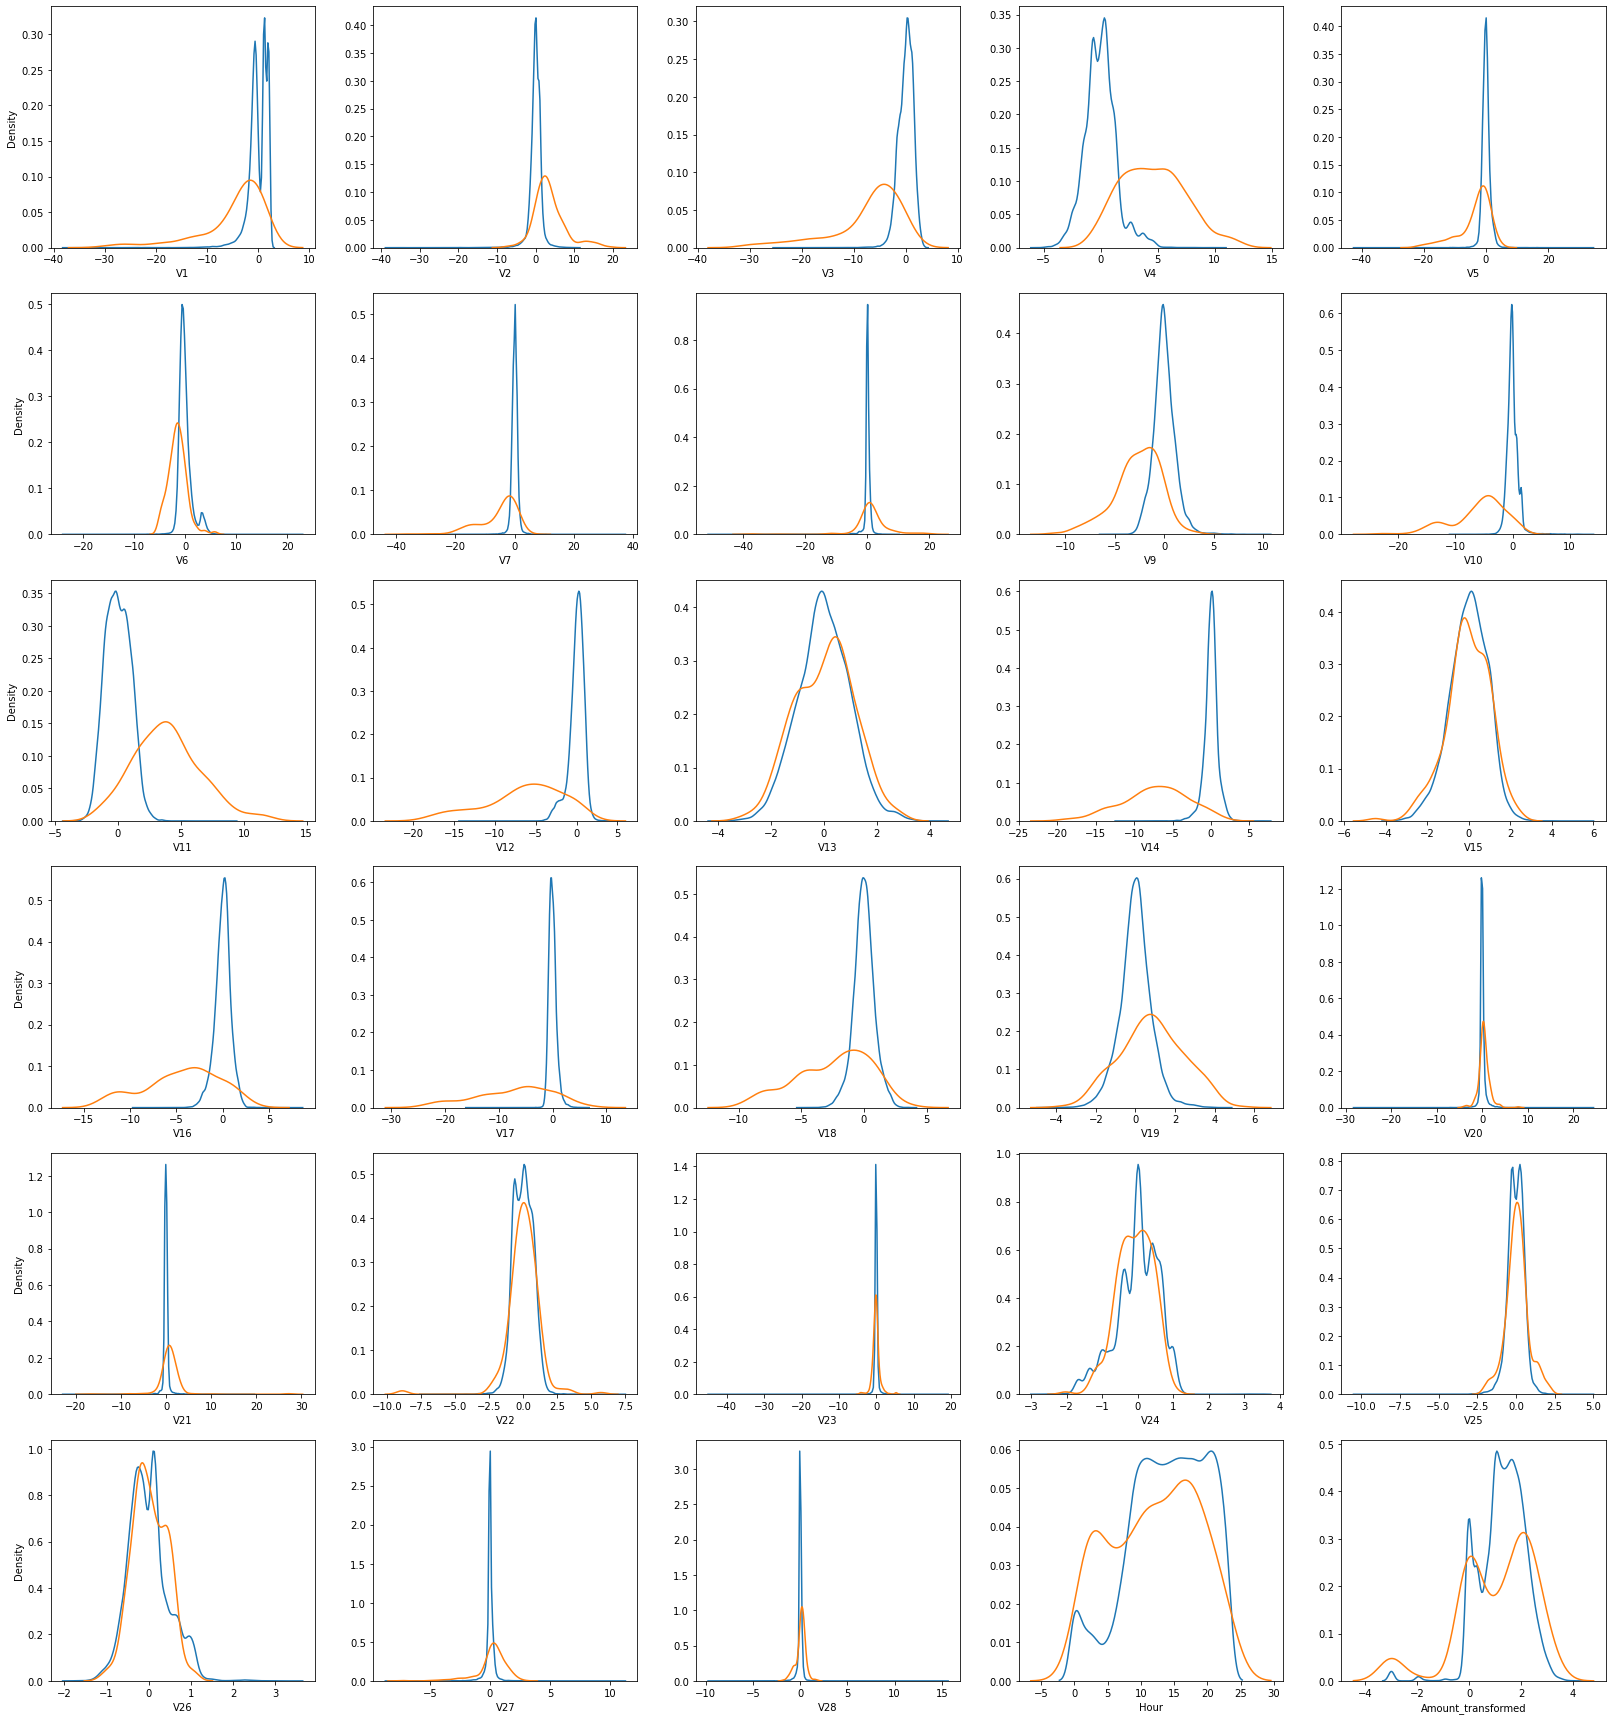

In [12]:
data_val = pd.concat([X_val, y_val], axis = 1)
data_val_0, data_val_1 = data_val[data_val['Class'] == 0], data_val[data_val['Class'] == 1]

cols, ncols = list(X_val.columns), 5
nrows = math.ceil(len(cols) / ncols)
fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))

for i in range(len(cols)):
    sns.kdeplot(data_val_0[cols[i]], ax = ax[i // ncols, i % ncols])
    sns.kdeplot(data_val_1[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
        
plt.tight_layout()
plt.show()

In [13]:
cols = ['V4', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Hour']
X_train_fs, X_val_fs, X_test_fs = X_train[cols], X_val[cols], X_test[cols]
X_train_fs.head()

V4       V11       V12       V14       V16       V17       V18  \
19594  -0.706232  2.027925  0.535822  0.250769  0.773615  0.449717 -1.963208   
124712  1.474933 -1.154523  0.263527  0.316174 -1.029415  1.030772 -0.438839   
167920  4.840766 -2.242431  0.034829 -0.546349 -0.070375  1.033695  0.531801   
47377   0.565273 -0.157045 -0.548790  0.419194  0.183518 -0.681323  0.911357   
41731  -0.428860 -0.580964 -0.609099 -0.187948  1.226723  0.104368 -0.995711   

             V19  Hour  
19594   0.613481   8.0  
124712  0.529080  21.0  
167920  1.215045   9.0  
47377   1.318132  11.0  
41731   0.420557  11.0

In [14]:
mu_train, sigma_train = X_train_fs.mean(), X_train_fs.std()

In [15]:
mu_train_new = mu_train.values.reshape(1, mu_train.shape[0])
sigma_train_new = sigma_train.values.reshape(1, sigma_train.shape[0])

In [16]:
def univariate_gaussian(x, mu, sigma):
    
    """
    Computes univariate normal probability density function (pdf) with mean mu, standard deviation sigma
    
    Args:
      x (DataFrame, shape (m, n))   : the data
      mu (2D-array, shape (1, n))   : means of each feature (column)
      sigma (2D-array, shape (1, n)): standard deviation of each feature (column)
      
    Returns:
      p (vector shape (m,)): probability of each sample
    """
    
#     assert sigma > 0, "Standard deviation must be positive"
    p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(1 / 2) * ((x - mu) / sigma)**2)
    p = np.prod(p, axis=1)
    return p

In [17]:
def model_normal(X, epsilon):
    """
    Anomaly detection model
    Args:
      X (DataFrame, shape (m, n)): DataFrame of features
      epsilon (scalar)           : threshold density value (> 0)
    Returns:
      y (array_like, shape (m,)): predicted class labels
    """
    y = []
    
    prob_density = univariate_gaussian(X, mu_train_new, sigma_train_new)
    y = (prob_density < epsilon).astype(int)
    
    return y.tolist()

In [25]:
def conf_mat_heatmap(y_test, y_pred):
    """
    Prints confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      Nothing, prints a heatmap representing a 2x2 confusion matrix
    """
    confusion_mat = confusion_matrix(y_test, y_pred)
    labels, confusion_mat_df = [0, 1], pd.DataFrame(confusion_mat, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.heatmap(confusion_mat_df, annot = True, annot_kws = {"size": 16}, fmt = 'd')
    plt.xticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.yticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.xlabel("Predicted label", fontsize = 14)
    plt.ylabel("True label", fontsize = 14)
    plt.title("Confusion Matrix", fontsize = 14)
    plt.grid(False)
    plt.show()
    
def f2_score(y_test, y_pred):
    """
    Computes accuracy, given true and predicted binary (0 or 1) labels
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      f2 (float): accuracy obtained from y_test and y_pred
    """
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    f2 = (5 * tp) / ((5 * tp) + (4 * fn) + fp)
    return f2

In [37]:
# list(itertools.product(np.arange(0.001, 0.051, 0.001), range(1)))

In [34]:
alpha_list, f2_list, f2_max, alpha_opt, y_val_pred_opt = [], [], 0.0, 0.0, np.zeros(len(y_val))
num_of_features = X_val_fs.shape[1]

for alpha in np.arange(0.001, 0.051, 0.001):
    
    y_val_pred = model_normal(X_val_fs, epsilon = alpha**num_of_features)
    f2 = f2_score(y_val, y_val_pred)
    
    alpha_list.append(alpha)
    f2_list.append(f2)
    
    if f2 > f2_max:
        alpha_opt = alpha
        y_val_pred_opt = y_val_pred
        f2_max = f2

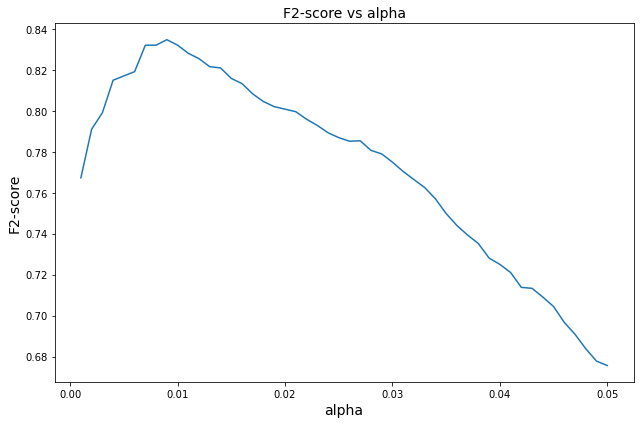

In [35]:
plt.figure(figsize = (9, 6))
plt.plot(alpha_list, f2_list)
plt.xlabel("alpha", fontsize = 14)
plt.ylabel("F2-score", fontsize = 14)
plt.title("F2-score vs alpha", fontsize = 14)
plt.tight_layout()
plt.show()

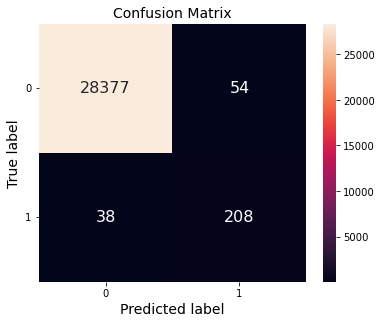

In [36]:
conf_mat_heatmap(y_val, y_val_pred_opt)

In [29]:
def evaluation(y_test, y_pred):
    confusion_mat = conf_mat(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]
    print(pd.Series({
        "Accuracy": (tp + tn) / (tn + fp + fn + tp),
        "Precision": tp / (tp + fp),
        "Recall": tp / (tp + fn),
        "F1-score": (2 * tp) / ((2 * tp) + fn + fp),
        "F2-score": (5 * tp) / ((5 * tp) + (4 * fn) + fp)
    }).to_string())

In [30]:
y_test_normal = model_normal(X_test_fs, epsilon = alpha_opt**X_test_fs.shape[1])
evaluation(y_test, y_test_normal)

Accuracy     0.996687
Precision    0.798419
Recall       0.821138
F1-score     0.809619
F2-score     0.816492


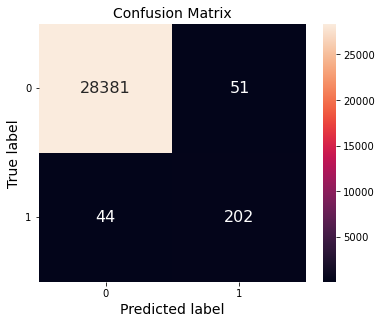

In [31]:
conf_mat_heatmap(y_test, y_test_normal)